<a href="https://colab.research.google.com/github/Sehn1302/Sehn1302/blob/main/project_bankruptcy_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unique values in the 'class' column:
['bankruptcy' 'non-bankruptcy']

Missing values in 'class' column:
0


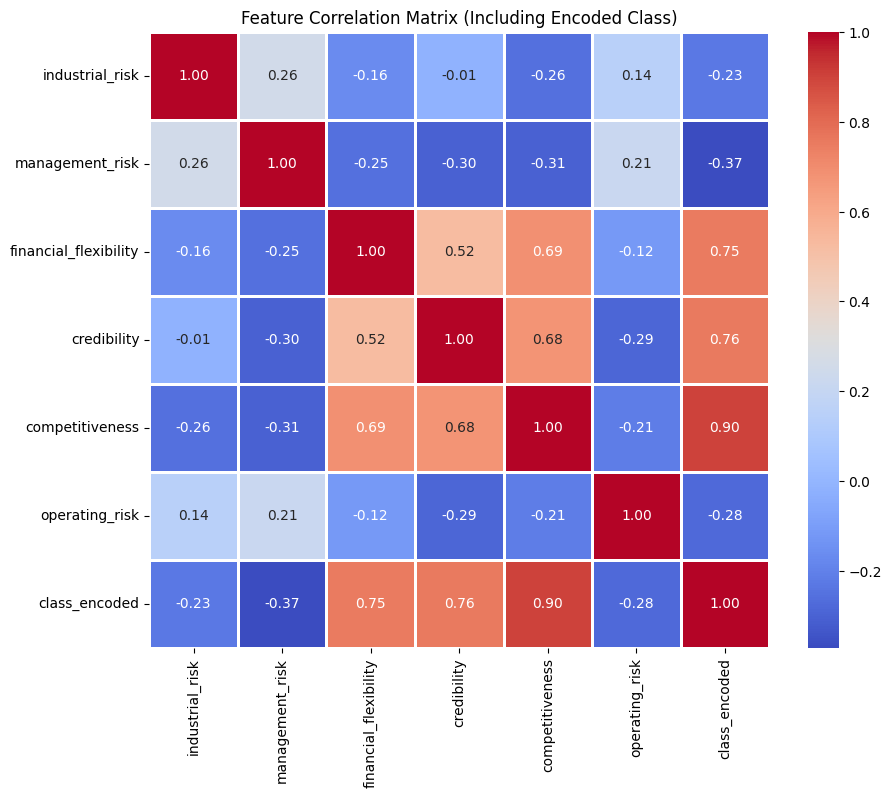

<ipython-input-22-8ed149773298>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')


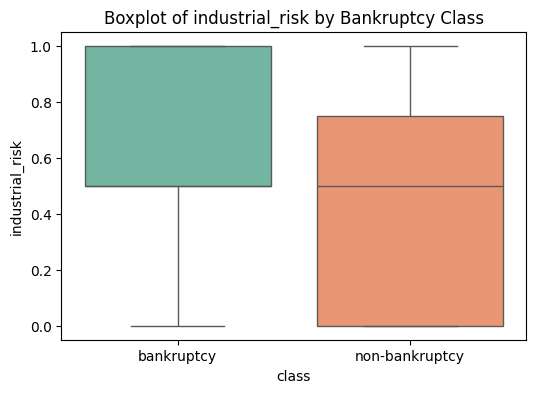

<ipython-input-22-8ed149773298>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')


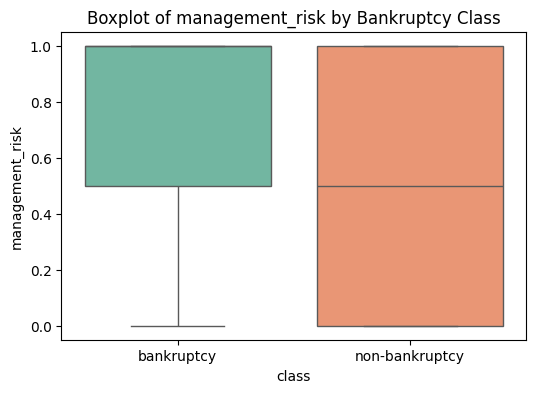

<ipython-input-22-8ed149773298>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')


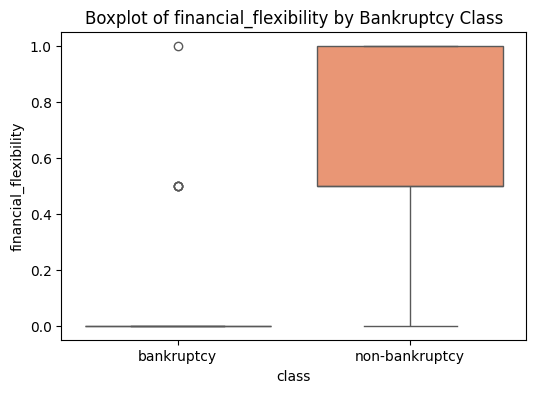

<ipython-input-22-8ed149773298>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')


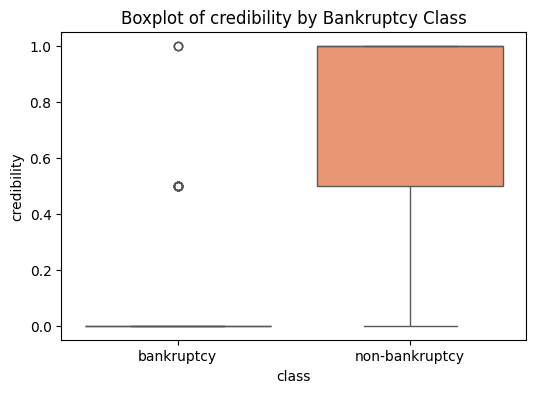

<ipython-input-22-8ed149773298>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')


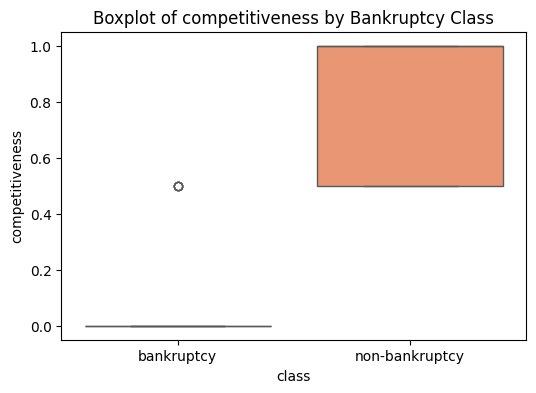

<ipython-input-22-8ed149773298>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, palette='Set2')


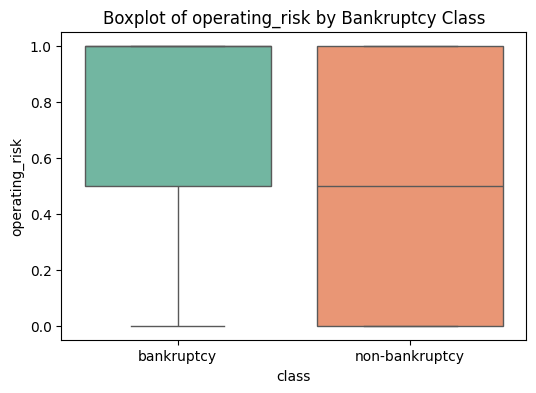


Correlation of features with encoded target variable:
class_encoded            1.000000
competitiveness          0.899452
credibility              0.755909
financial_flexibility    0.751020
industrial_risk         -0.227823
operating_risk          -0.279786
management_risk         -0.370838
Name: class_encoded, dtype: float64


In [22]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load the dataset
data = pd.read_excel('Bankruptcy (2).xlsx')

# Check for unique values in the 'class' column before encoding
print("Unique values in the 'class' column:")
print(data['class'].unique())

# Check for missing values in 'class' column
print("\nMissing values in 'class' column:")
print(data['class'].isnull().sum())

# If there are missing values or unexpected values, clean the 'class' column here
# For example, drop rows with missing 'class' values:
# data = data.dropna(subset=['class'])

# Encode the 'class' variable into numeric form for correlation analysis
labelencoder = LabelEncoder()  # Ensure LabelEncoder is correctly defined and imported
data['class_encoded'] = labelencoder.fit_transform(data['class'])

# Create a correlation matrix excluding the original 'class' variable
# Only use numeric features for the correlation matrix
numeric_features = ['industrial_risk', 'management_risk', 'financial_flexibility',
                    'credibility', 'competitiveness', 'operating_risk', 'class_encoded']

correlation_matrix = data[numeric_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Feature Correlation Matrix (Including Encoded Class)')
plt.show()

# Box plots to check for outliers in features by each class
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=feature, data=data, palette='Set2')
    plt.title(f'Boxplot of {feature} by Bankruptcy Class')
    plt.show()

# Data Evaluation - Correlation with the Target Variable
# As 'class' is likely categorical, we use Label Encoding for the correlation analysis
#from sklearn.preprocessing import LabelEncoder # This import is no longer needed as it was done at the top
labelencoder = LabelEncoder()
data['class_encoded'] = labelencoder.fit_transform(data['class'])

# Calculate correlation matrix using only numeric features and the encoded class
corr_with_target = data[numeric_features].corr()['class_encoded'].sort_values(ascending=False)

print("\nCorrelation of features with encoded target variable:")
print(corr_with_target)

### Code Explanation:

This code is designed to perform exploratory data analysis (EDA) and correlation analysis for a bankruptcy dataset. The key objective is to assess the relationships between different features and the target variable, `class` (bankruptcy status), which is categorical in nature.

1. **Import Necessary Libraries**:
   - `pandas`: Used for loading and manipulating the dataset.
   - `seaborn` and `matplotlib`: For data visualization (heatmaps, box plots).
   - `numpy`: For numerical operations.
   - `LabelEncoder` from `sklearn.preprocessing`: To convert categorical variables (e.g., `class`) into numeric values for correlation analysis.

2. **Load the Dataset**:
   - The dataset is loaded from an Excel file (`Bankruptcy (2).xlsx`) using `pandas.read_excel()`.

3. **Data Exploration**:
   - The code first inspects the unique values in the `class` column to check the distinct categories in the target variable (e.g., "bankruptcy", "non-bankruptcy", etc.).
   - It also checks for missing values in the `class` column, which is important to ensure that the target variable is fully populated. If missing values are found, they can be handled (e.g., dropped).

4. **Label Encoding**:
   - The `LabelEncoder()` is used to convert the `class` column (categorical) into numeric values. This encoding is necessary for correlation analysis, as most statistical methods require numeric inputs. Each class is transformed into an integer (e.g., "bankruptcy" might be encoded as `0`, and "non-bankruptcy" as `1`).

5. **Correlation Matrix**:
   - A correlation matrix is calculated using only the numeric features, including the encoded target variable (`class_encoded`). The correlation matrix shows the linear relationships between the features, with values ranging from `-1` to `1`. A value closer to `1` indicates a strong positive correlation, while a value closer to `-1` indicates a strong negative correlation.
   - The code then visualizes this correlation matrix using a heatmap to provide a graphical overview of how the features relate to each other and to the target variable.

6. **Box Plots**:
   - For each feature, a box plot is generated to visualize the distribution of the feature across different categories of the target variable (`class`). Box plots help identify outliers and show how the data is spread across different values of the target.

7. **Data Evaluation (Correlation with the Target Variable)**:
   - The code calculates the correlation between each numeric feature and the target variable (`class_encoded`). The features are then sorted based on their correlation with the target, allowing us to see which features have the strongest relationship with bankruptcy.

8. **Print Correlation with Target**:
   - Finally, the code prints the sorted correlation values, showing which features are most influential in predicting bankruptcy. This is useful for understanding which variables are most relevant for classification.

This code provides a comprehensive way to explore, visualize, and analyze the relationships between features and the target variable in the bankruptcy dataset, preparing the data for further modeling and analysis.